### Версия Python

In [1]:
!python -V

Python 3.12.6


### Импорт необходимых библиотек

In [2]:
# Подавление предупреждений
import warnings
for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category = warn)

import os
import glob
import qbstyles
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import jupyterlab as jlab

from qbstyles import mpl_style

mpl_style(dark = False)

### Версии необходимых библиотек

In [3]:
packages = [
    "Pandas", "Matplotlib", "Seaborn", "JupyterLab", "Qbstyles"
]

package_objects = [
    pd, matplotlib, sns, jlab, qbstyles
]

versions = list(map(lambda obj: obj.__version__, package_objects))

pkgs = {"Библиотека": packages, "Версия": versions}
df_pkgs = pd.DataFrame(data = pkgs)
df_pkgs.index.name = "№"
df_pkgs.index += 1

display(df_pkgs)

path_to_reqs = "."
reqs_name = "requirements.txt"

def get_packages_and_versions():
    """Генерация строк с библиотеками и их версиями в формате: библиотека==версия"""
    
    for package, version in zip(packages, versions):
        yield f"{package.lower()}=={version}\n"

with open(os.path.join(path_to_reqs, reqs_name), "w", encoding = "utf-8") as f:
    f.writelines(get_packages_and_versions())

,Библиотека,Версия
№,,
1,Pandas,2.2.2
2,Matplotlib,3.9.1
3,Seaborn,0.13.2
4,JupyterLab,4.2.4
5,Qbstyles,0.1.4


### Статистика по файлам ПУД

In [4]:
path_to_files = "/Users/dl/GitHub/ArenaVSRS/data/subjects"

xlsx_files = glob.glob(os.path.join(path_to_files, "*.xlsx"))

df = pd.DataFrame()

for file in xlsx_files:
    df_temp = pd.read_excel(file)
    df = pd.concat([df, df_temp], ignore_index = True)

In [5]:
num_rows = len(df)

columns = df.columns.tolist()

print(f"Количество строк: {num_rows}")
print(f"Список названий столбцов ({len(columns)}): {columns}")

Количество строк: 52211
Список названий столбцов (20): ['Unnamed: 0', 'ID дисциплины БУП ППК (АСАВ)', 'ID дисциплины БУП ППК (SmartPlan)', 'Русскоязычное название дисциплины', 'Англоязычное название дисциплины', 'ID программы', 'Кафедра, предлагающая дисциплину', 'Факультет кафедры, предлагающей дисциплину', 'Кампус кафедры, предлагающей дисциплину', 'Список языков реализации дисциплины', 'Число кредитов', 'Период изучения дисциплины', 'Уровень обучения', 'Охват аудитории', 'Название программы', 'Аннотация', 'Тип плана', 'Формат изучения', 'Список разделов (названия и описания)', 'Список планируемых результатов обучения РПУДа']


In [6]:
df.dtypes # Типы данных в каждом столбце

Unnamed: 0                                         int64
ID дисциплины БУП ППК (АСАВ)                       int64
ID дисциплины БУП ППК (SmartPlan)                  int64
Русскоязычное название дисциплины                 object
Англоязычное название дисциплины                  object
ID программы                                     float64
Кафедра, предлагающая дисциплину                  object
Факультет кафедры, предлагающей дисциплину        object
Кампус кафедры, предлагающей дисциплину           object
Список языков реализации дисциплины               object
Число кредитов                                   float64
Период изучения дисциплины                        object
Уровень обучения                                  object
Охват аудитории                                   object
Название программы                                object
Аннотация                                         object
Тип плана                                         object
Формат изучения                

In [7]:
df.describe() # Общая статистика по числовым столбцам

,Unnamed: 0,ID дисциплины БУП ППК (АСАВ),ID дисциплины БУП ППК (SmartPlan),ID программы,Число кредитов
count,52211.000000,5.221100e+04,52211.000000,48728.000000,52185.000000
mean,6529.511176,8.196323e+09,532924.722913,925697.786529,5.866820
std,3772.535472,4.319222e+09,227742.849701,80724.993956,5.669733
min,1.000000,2.054231e+09,518.000000,313154.000000,0.000000
25%,3264.000000,5.486710e+09,343834.000000,889573.000000,3.000000
50%,6527.000000,6.524510e+09,468110.000000,957335.000000,4.000000
75%,9790.000000,7.952395e+09,739612.000000,988099.250000,6.000000
max,13230.000000,1.628151e+10,937477.000000,996963.000000,110.000000


#### Кампус кафедры, предлагающей дисциплину

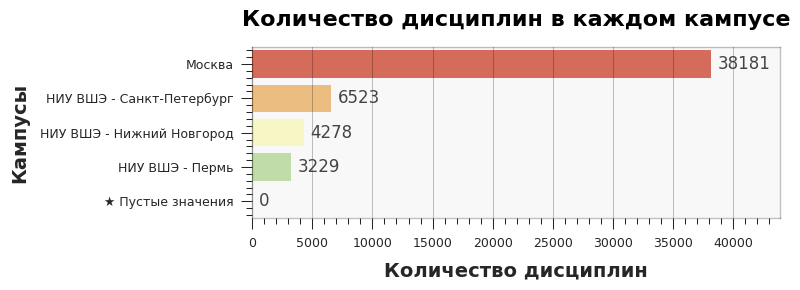

In [8]:
# Определение нужного столбца
column = "Кампус кафедры, предлагающей дисциплину"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (8, 3))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.15

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество дисциплин в каждом кампусе", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Кампусы", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Список языков реализации дисциплины

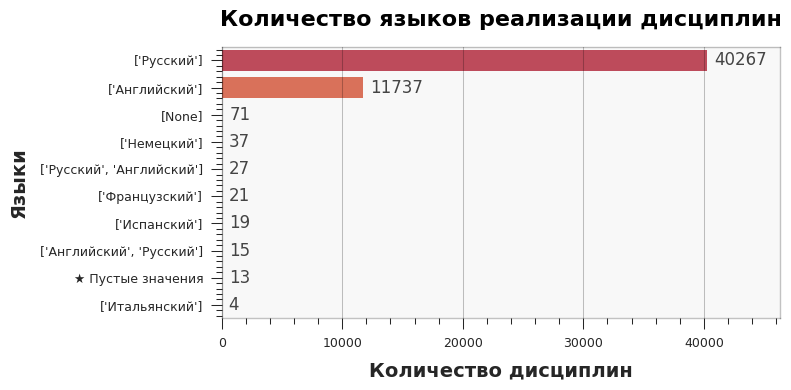

In [9]:
# Определение нужного столбца
column = "Список языков реализации дисциплины"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (8, 4))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.15

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество языков реализации дисциплин", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Языки", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Уровень обучения

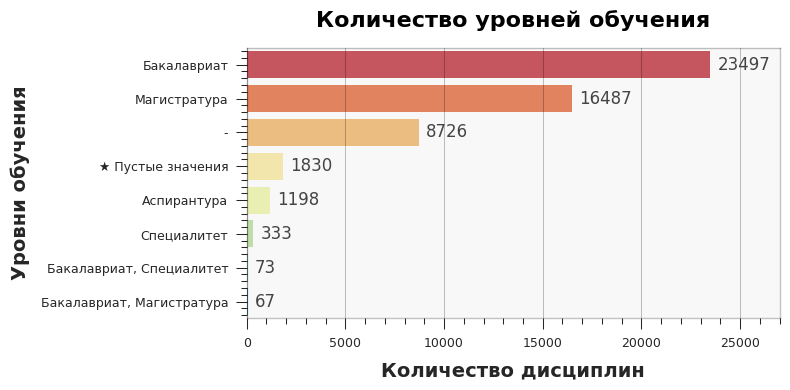

In [10]:
# Определение нужного столбца
column = "Уровень обучения"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (8, 4))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.15

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество yровней обучения", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Уровни обучения", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Охват аудитории

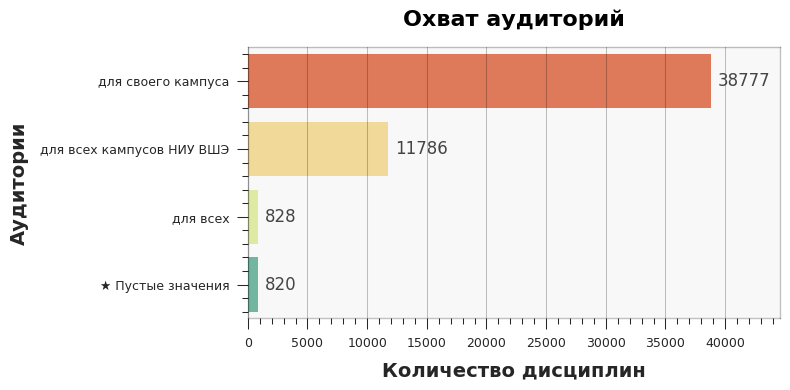

In [11]:
# Определение нужного столбца
column = "Охват аудитории"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (8, 4))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.15

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Охват аудиторий", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Аудитории", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Тип плана

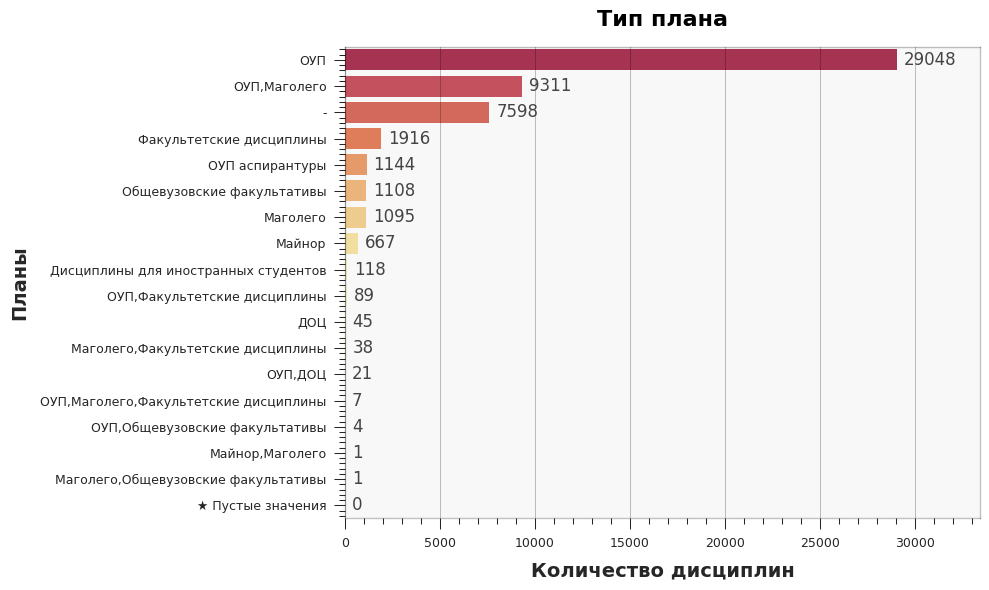

In [13]:
# Определение нужного столбца
column = "Тип плана"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (10, 6))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.15

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Тип плана", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Планы", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Формат изучения

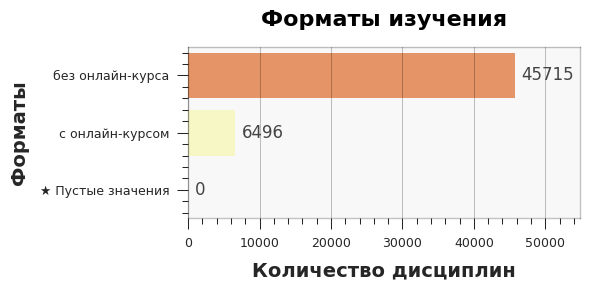

In [17]:
# Определение нужного столбца
column = "Формат изучения"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (6, 3))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.20

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Форматы изучения", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Форматы", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Число кредитов

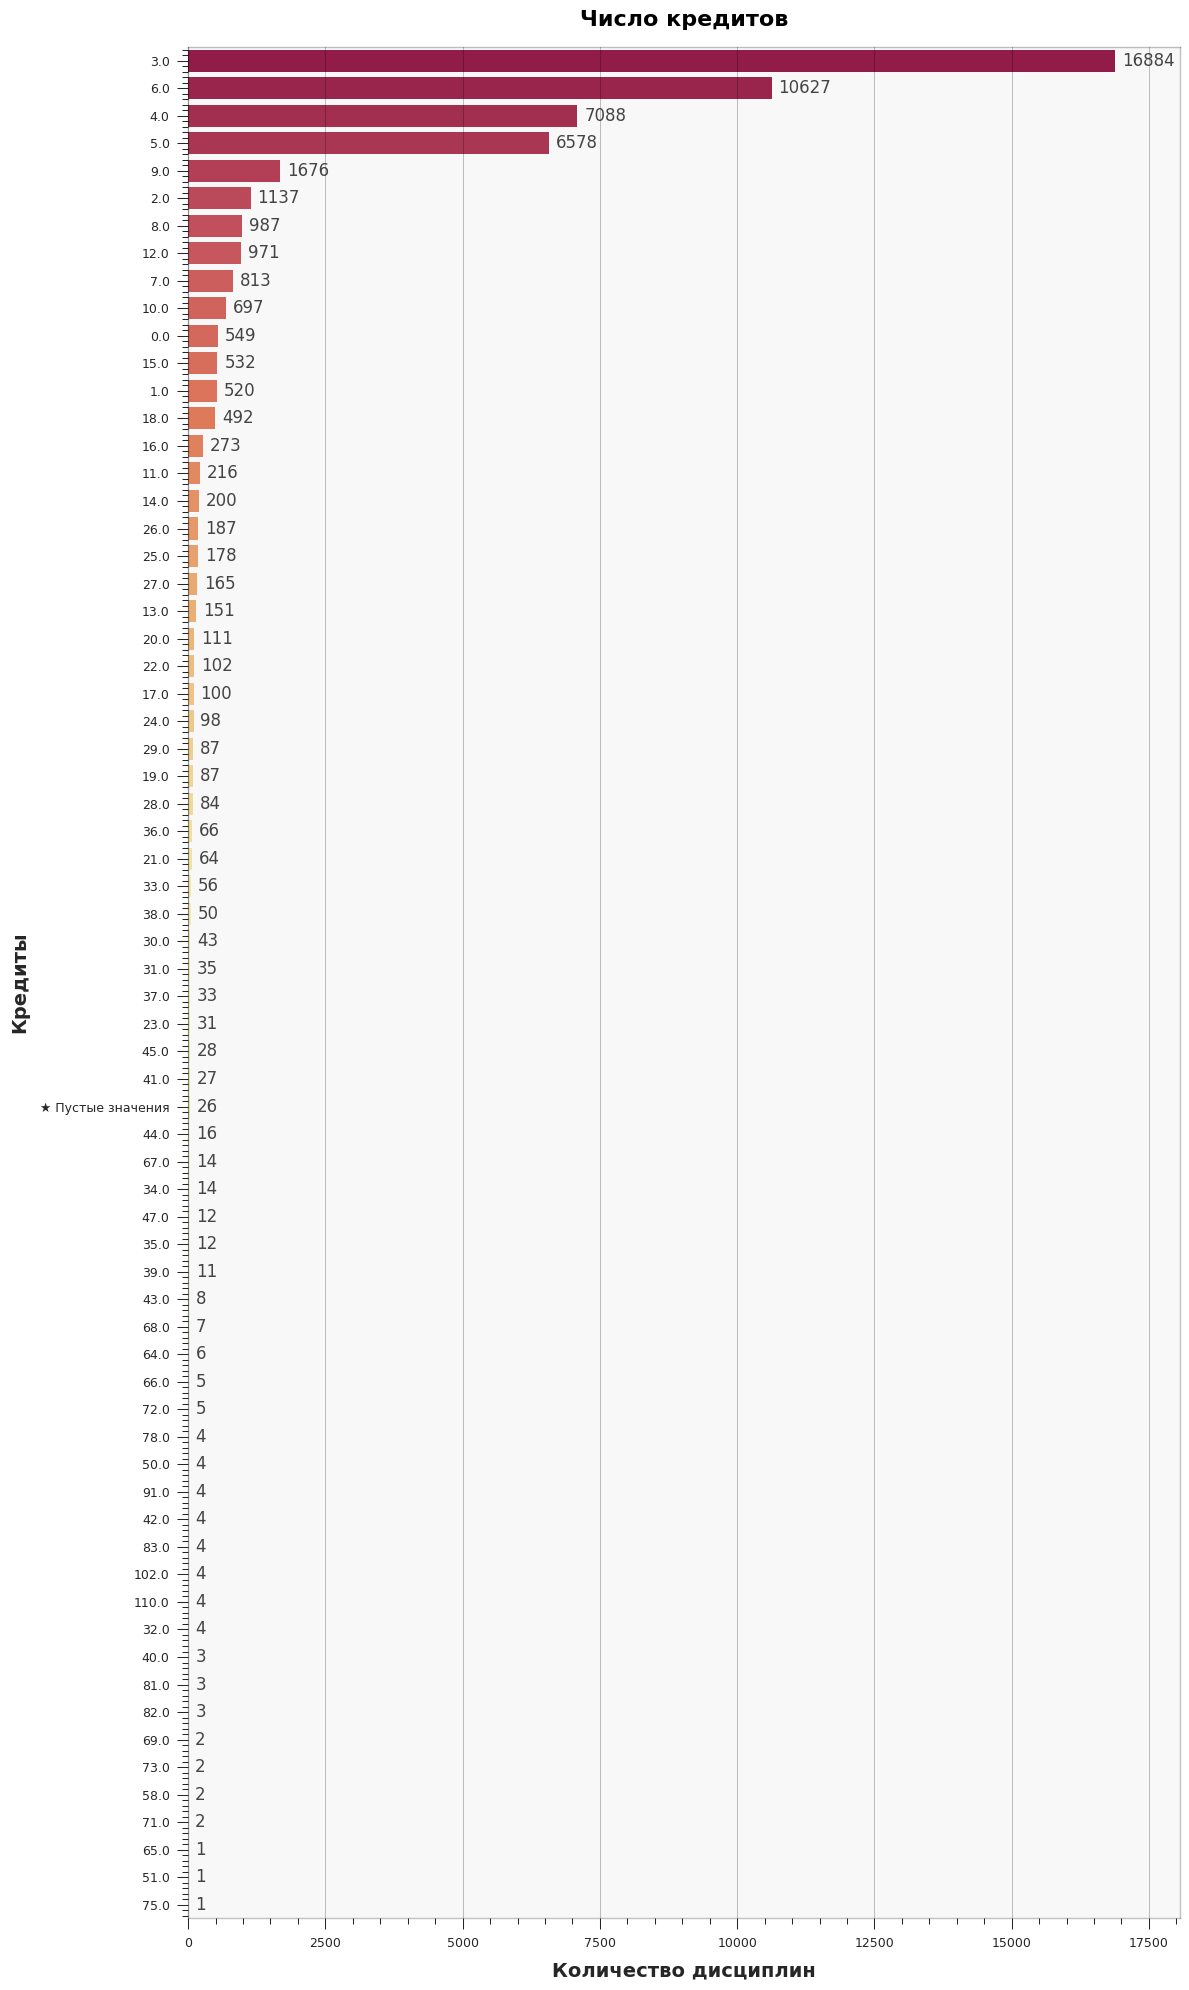

In [18]:
# Определение нужного столбца
column = "Число кредитов"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (12, 20))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.07

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Число кредитов", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Кредиты", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

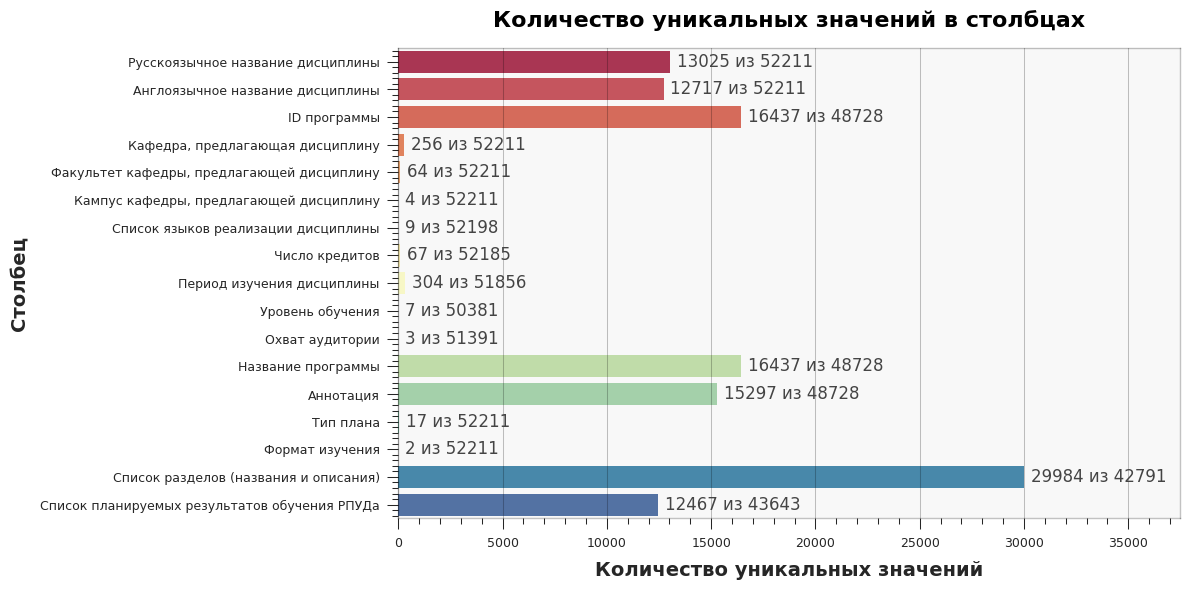

In [15]:
# Важные столбцы
important_columns = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# Словари для хранения количества уникальных значений и общего количества значений
unique_values = {}
total_values = {}

# Количество уникальных значений и общее количество значений в столбцах
for cnt in important_columns:
    column = columns[cnt]
    unique_values[column] = df[column].nunique()
    total_values[column] = df[column].notnull().sum()

# Преобразование словаря в DataFrame для удобства построения графика
unique_values_df = pd.DataFrame(list(unique_values.items()), columns = ["Столбец", "Количество уникальных значений"])
unique_values_df["Общее количество значений"] = unique_values_df["Столбец"].map(total_values)

# Визуализация
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = "Количество уникальных значений", y = "Столбец", data = unique_values_df, palette = "Spectral")

# Определение максимального значения для оси X
max_value = unique_values_df["Количество уникальных значений"].max()
buffer = max_value * 0.25  # Добавление буфера

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа рядом с каждым столбцом
for i, p in enumerate(ax.patches):
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    column_name = unique_values_df.iloc[i]["Столбец"]
    total_count = unique_values_df[unique_values_df["Столбец"] == column_name]["Общее количество значений"].values[0]
    label = f"{int(width)} из {int(total_count)}"
    ax.annotate(label, (width, y), ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество уникальных значений в столбцах", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество уникальных значений", fontsize = 14, fontweight = "bold")
plt.ylabel("Столбец", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Отображение графика
plt.show()

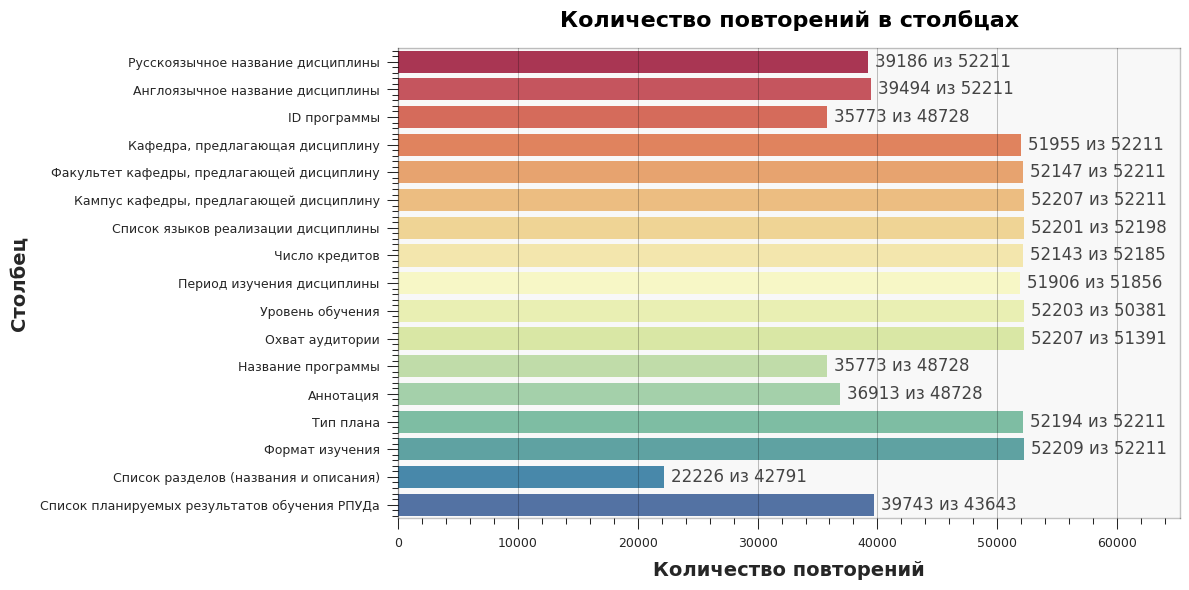

In [16]:
# Словари для хранения количества повторений и общего количества значений
duplicates_count = {}
total_values = {}

# Количество повторений и общее количество значений в столбцах
for cnt in important_columns:
    column = columns[cnt]
    duplicates_count[column] = df[column].duplicated().sum()
    total_values[column] = df[column].notnull().sum()

# Преобразование словаря в DataFrame для удобства построения графика
duplicates_df = pd.DataFrame(list(duplicates_count.items()), columns = ["Столбец", "Количество повторений"])
duplicates_df["Общее количество значений"] = duplicates_df["Столбец"].map(total_values)

# Визуализация
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = "Количество повторений", y = "Столбец", data = duplicates_df, palette = "Spectral")

# Определение максимального значения для оси X
max_value = duplicates_df["Количество повторений"].max()
buffer = max_value * 0.25 # Добавление буфера

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа рядом с каждым столбцом
for i, p in enumerate(ax.patches):
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    column_name = duplicates_df.iloc[i]["Столбец"]
    total_count = duplicates_df[duplicates_df["Столбец"] == column_name]["Общее количество значений"].values[0]
    label = f'{int(width)} из {int(total_count)}'
    ax.annotate(label, (width, y), ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество повторений в столбцах", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество повторений", fontsize = 14, fontweight = "bold")
plt.ylabel("Столбец", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Отображение графика
plt.show()

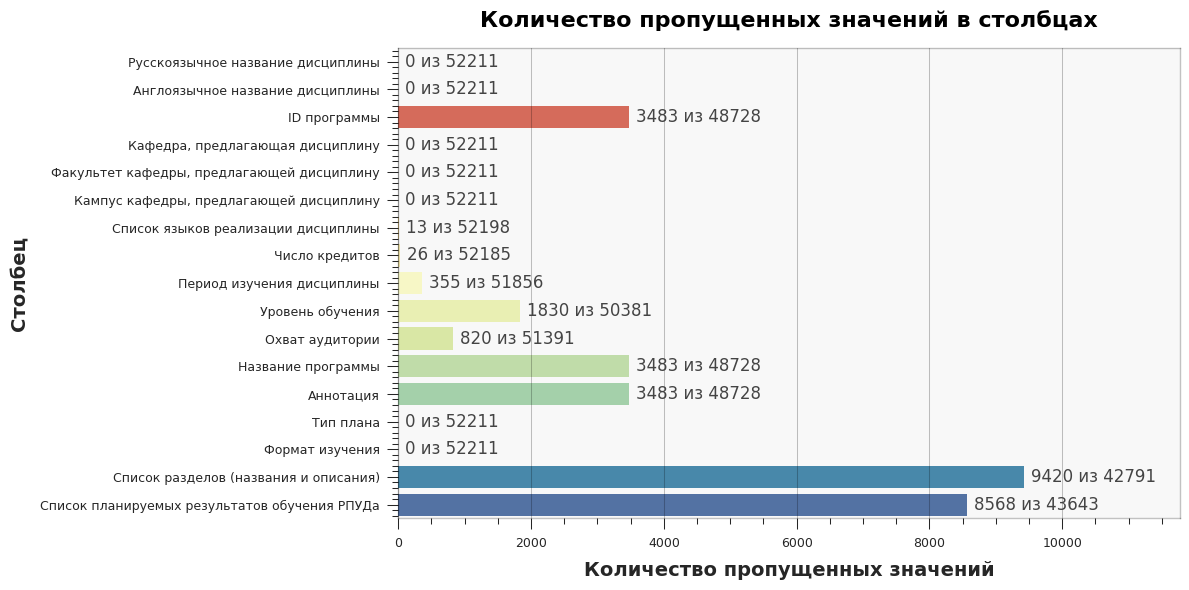

In [17]:
# Словари для хранения количества пропущенных значений и общего количества значений
missing_values_count = {}
total_values = {}

# Количество пропущенных значений и общее количество значений в столбцах
for cnt in important_columns:
    column = columns[cnt]
    missing_values_count[column] = df[column].isnull().sum()
    total_values[column] = df[column].notnull().sum()

# Преобразование словаря в DataFrame для удобства построения графика
missing_values_df = pd.DataFrame(list(missing_values_count.items()), columns = ["Столбец", "Количество пропущенных значений"])
missing_values_df["Общее количество значений"] = missing_values_df["Столбец"].map(total_values)

# Визуализация
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = "Количество пропущенных значений", y = "Столбец", data = missing_values_df, palette = "Spectral")

# Определение максимального значения для оси X
max_value = missing_values_df["Количество пропущенных значений"].max()
buffer = max_value * 0.25 # Добавление буфера

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа рядом с каждым столбцом
for i, p in enumerate(ax.patches):
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    column_name = missing_values_df.iloc[i]["Столбец"]
    total_count = missing_values_df[missing_values_df["Столбец"] == column_name]["Общее количество значений"].values[0]
    label = f"{int(width)} из {int(total_count)}"
    ax.annotate(label, (width, y), ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество пропущенных значений в столбцах", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество пропущенных значений", fontsize = 14, fontweight = "bold")
plt.ylabel("Столбец", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Отображение графика
plt.show()

In [18]:
important_columns_vc = [8, 9, 10, 12, 13, 16, 17]

# Распределение значений в столбцах
for cnt, column in enumerate(columns):
    if cnt in important_columns_vc:
        print(f"Распределение значений в столбце {cnt} - {column}: {df[column].value_counts()}")

Распределение значений в столбце 8 - Кампус кафедры, предлагающей дисциплину: Кампус кафедры, предлагающей дисциплину
Москва                       38181
НИУ ВШЭ - Санкт-Петербург     6523
НИУ ВШЭ - Нижний Новгород     4278
НИУ ВШЭ - Пермь               3229
Name: count, dtype: int64
Распределение значений в столбце 9 - Список языков реализации дисциплины: Список языков реализации дисциплины
['Русский']                  40267
['Английский']               11737
[None]                          71
['Немецкий']                    37
['Русский', 'Английский']       27
['Французский']                 21
['Испанский']                   19
['Английский', 'Русский']       15
['Итальянский']                  4
Name: count, dtype: int64
Распределение значений в столбце 10 - Число кредитов: Число кредитов
3.0     16884
6.0     10627
4.0      7088
5.0      6578
9.0      1676
        ...  
58.0        2
71.0        2
65.0        1
51.0        1
75.0        1
Name: count, Length: 67, dtype: int64
Расп

In [19]:
# Анализ категориальных данных
pd.crosstab(df[columns[7]], df[columns[8]])

"Кампус кафедры, предлагающей дисциплину",Москва,НИУ ВШЭ - Нижний Новгород,НИУ ВШЭ - Пермь,НИУ ВШЭ - Санкт-Петербург
"Факультет кафедры, предлагающей дисциплину",,,,
"Базовая кафедра Музея современного искусства ""Гараж""",106,0,0,0
Базовые кафедры,9,0,0,0
Банковский институт,254,0,0,0
Вечерне-заочный факультет экономики и управления,0,0,1037,0
Высшая школа бизнес-информатики,4,0,0,0
...,...,...,...,...
факультет социальных наук,3403,0,0,0
факультет физики,782,0,0,0
факультет химии,259,0,0,0


In [20]:
# Количество уникальных комбинаций
df[['Кампус кафедры, предлагающей дисциплину', 'Факультет кафедры, предлагающей дисциплину']].drop_duplicates().shape[0]

65

In [21]:
df_cleaned = df.drop_duplicates(subset = ['Русскоязычное название дисциплины', 'Факультет кафедры, предлагающей дисциплину'])

# Затем группируем по "Факультет кафедры, предлагающей дисциплину" и собираем дисциплины в список
grouped_df = df_cleaned.groupby('Факультет кафедры, предлагающей дисциплину')['Русскоязычное название дисциплины'].apply(list).reset_index()

num = 0
# Теперь grouped_df будет содержать факультеты и список уникальных дисциплин для каждого из них
print(grouped_df.iloc[num]['Факультет кафедры, предлагающей дисциплину'])
print(grouped_df.iloc[num]['Русскоязычное название дисциплины'])

Базовая кафедра Музея современного искусства "Гараж"
['Современное искусство в России', 'Профессии в арт-мире', 'Выставочная деятельность', 'Особенности исследования в современном искусстве', 'Управление выставочными проектами', 'Анализ и интерпретации современного искусства: модели и инструментарий', 'Издательское дело в выставочном процессе', 'Современная критика', 'История медиа – история современного искусства', 'Логистика и таможенные режимы', 'Хранение произведений современного искусства', 'Научно-исследовательский семинар "Планирование и этапы подготовки выставки"', 'Современное искусство. Введение', 'История музейно-выставочного дела', 'Теория и история культуры', 'Специфика визуального восприятия современного искусства', 'Семинар наставника «Планирование и этапы подготовки выставки»', 'Музей как политический, экономический, социальный институт', 'Семинар наставника «Планирование и этапы подготовки культурного проекта»', 'Программное планирование', 'Теория и история искусства',

In [22]:
import pandas as pd

# Предположим, ваш DataFrame называется df
df_cleaned = df.drop_duplicates(subset=['Русскоязычное название дисциплины', 'Факультет кафедры, предлагающей дисциплину'])

# Объединяем нужные столбцы в один текст для каждой строки
df_cleaned['Full_Info'] = (
    df_cleaned['Русскоязычное название дисциплины'] + 
    '\nАннотация: ' + df_cleaned['Аннотация'].fillna('') +
    '\nСписок разделов: ' + df_cleaned['Список разделов (названия и описания)'].fillna('') +
    '\nСписок планируемых результатов обучения: ' + df_cleaned['Список планируемых результатов обучения РПУДа'].fillna('')
)

# Группируем по факультету и собираем объединенные тексты в список
grouped_df = df_cleaned.groupby('Факультет кафедры, предлагающей дисциплину')['Full_Info'].apply(list).reset_index()

# Пример вывода информации для факультета с индексом num
num = 0
print(grouped_df.iloc[num]['Факультет кафедры, предлагающей дисциплину'])
print("\n\n".join(grouped_df.iloc[num]['Full_Info']))

Базовая кафедра Музея современного искусства "Гараж"
Современное искусство в России
Аннотация: Модуль продолжает общий курс истории и теории современного искусства и сконцентрирован на художественных процессах, происходивших в России с начала 20 века, а также актуальных сегодня. Особое внимание будет уделено 50-90 гг. Специфика отечественного искусства объясняется изоляцией советской (и отчасти постсоветской) культуры от западных образцов и формированием в этих герметичных условиях уникального явления независимого, или нонконформистского искусства. Как, вопреки всевозможным запретам и на фоне тотального соцреализма, в СССР возникли свои концептуалисты, метафизики, абстракционисты, авторы инсталляций и перформансов, как выглядели квартирные арт-галереи и выставки-однодневки — этим и другим приметам российского искусства посвящена посвящена данная дисциплина.

Формат занятий: Занятия для студентов московского кампуса проводятся оффлайн. Для студентов из других кампусов предусмотрена тран

/var/folders/gw/w3k5kxtx0s3_nqdqw94zr8yh0000gn/T/ipykernel_74353/2387229819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Full_Info'] = (


In [23]:
# Количество уникальных комбинаций
df[['Русскоязычное название дисциплины', 'Аннотация']].drop_duplicates().shape[0]

19095

In [24]:
# Количество уникальных комбинаций
df[['Англоязычное название дисциплины', 'Аннотация']].drop_duplicates().shape[0]

18976

In [43]:
df[df["Русскоязычное название дисциплины"].str.contains("Управление проектами", case = False, na = False)]

,Unnamed: 0,ID дисциплины БУП ППК (АСАВ),ID дисциплины БУП ППК (SmartPlan),Русскоязычное название дисциплины,Англоязычное название дисциплины,ID программы,"Кафедра, предлагающая дисциплину","Факультет кафедры, предлагающей дисциплину","Кампус кафедры, предлагающей дисциплину",Список языков реализации дисциплины,Число кредитов,Период изучения дисциплины,Уровень обучения,Охват аудитории,Название программы,Аннотация,Тип плана,Формат изучения,Список разделов (названия и описания),Список планируемых результатов обучения РПУДа
52,53,2829830545,77447,Управление проектами,Project Management,811135.0,Высшая школа урбанистики имени А.А. Высоковского,факультет городского и регионального развития,Москва,['Русский'],4.0,1 модуль 2022/2023 - 2 модуль 2022/2023,-,для своего кампуса,Управление проектами <811135>,Влияние практических навыков менеджера по упра...,-,без онлайн-курса,"""Тема 5. Выполнение, контроль и завершение про...",▪ Анализирует ключевые элементы управления в п...
179,180,2862646600,60137,Управление проектами,Project Management,708694.0,Факультет менеджмента,Факультет менеджмента,НИУ ВШЭ - Нижний Новгород,['Русский'],6.0,1 модуль 2022/2023 - 1 модуль 2022/2023,Бакалавриат,для своего кампуса,Управление проектами <708694>,Курс нацелен на формирование системы знаний о ...,ОУП,без онлайн-курса,"""Организационные структуры""(51984):Классификац...",Владеть навыками оценивания рисков и возможнос...
217,218,2865680870,18148,Управление проектами,Project Management,752514.0,Кафедра венчурного менеджмента,Факультет менеджмента,НИУ ВШЭ - Нижний Новгород,['Русский'],4.0,3 модуль 2022/2023 - 3 модуль 2022/2023,Бакалавриат,для всех кампусов НИУ ВШЭ,Управление проектами <752514>,"Нет такого человека, которому ни разу в жизни ...",ОУП,без онлайн-курса,"""Методологические основы управления проектами""...",Классифицирует стейкхолдеров проекта по степен...
739,740,3776322937,90961,Управление проектами,Project Management,794997.0,кафедра компьютерной безопасности,Московский институт электроники и математики и...,Москва,['Русский'],3.0,3 модуль 2022/2023 - 3 модуль 2022/2023,-,NaN,Управление проектами <794997>,Предназначение данного курса состоит в развити...,-,с онлайн-курсом,"""Управление качеством проекта""(50567):Понятие ...",Обучающийся знает общую методологию построения...
819,820,3786072231,111039,Управление проектами,Project Management,757413.0,институт профессиональной переподготовки специ...,институт профессиональной переподготовки специ...,Москва,['Русский'],5.0,3 модуль 2022/2023 - 3 модуль 2022/2023,Бакалавриат,для своего кампуса,Управление проектами <757413>,В объединенном учебном плане образовательной п...,ОУП,без онлайн-курса,"""Тема 2. Стандарты управления проектами и спец...","знать основные понятия, термины, стандарты и м..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50378,11317,16281505216,896565,Управление проектами,Project Management,992088.0,Кафедра венчурного менеджмента,Факультет менеджмента,НИУ ВШЭ - Нижний Новгород,['Русский'],4.0,3 модуль 2024/2025 - 3 модуль 2024/2025,Бакалавриат,для своего кампуса,Управление проектами (НН МБЭиБ),"Нет такого человека, которому ни разу в жизни ...",ОУП,без онлайн-курса,"""Управление командой проекта""(178651):Формиров...",Классифицирует стейкхолдеров проекта по степен...
50847,11786,16281505843,908339,Управление проектами,Project Management,924736.0,департамент стратегического и международного м...,Высшая школа бизнеса,Москва,['Русский'],4.0,1 модуль 2024/2025 - 2 модуль 2024/2025,Бакалавриат,для всех кампусов НИУ ВШЭ,Управление проектами <924736>,Курс «Управление проектами» носит инструментал...,ОУП,без онлайн-курса,"""Введение в управление проектами""(99270):Истор...",Знать: - этапы исторической эволюции управлени...
51109,12048,16281506157,911821,Управление проектами,Project Management,927096.0,департамент стратегического и международного м...,Высшая школа бизнеса,Москва,['Русский'],3.0,2 модуль 2024/2025 - 2 модуль 2024/2025,Магистратура,для

In [26]:
df["Русскоязычное название дисциплины"][50753]

'Методы Монте - Карло и МЛ'

In [31]:
df["Аннотация"][50753]

'Курс "Методы Монте-Карло и Машинное обучение" знакомит студентов с передовыми методами в области статистического моделирования и машинного обучения. Программа курса включает изучение ключевых алгоритмов Методов Монте-Карло, применение байесовских методов в машинном обучении, а также использование библиотеки PyMC3 для построения и анализа байесовских моделей. Студенты получат не только теоретические знания, но также и практические навыки работы с данными, что позволит им успешно применять передовые методы анализа данных и построения моделей в своей профессиональной деятельности.'

In [32]:
df["Список разделов (названия и описания)"][50753]

nan

In [33]:
df["Список планируемых результатов обучения РПУДа"][50753]

nan

In [ ]:
df["Ограничения: Вид майноров"].isnull().sum()
df["Ограничения: Вид майноров"].value_counts()